# Proyecto:  modelos predictivos de regresión lineal uni-variable
**Descripción general**
El proyecto consiste en crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

**y = f(x) =  mx +b**

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)


In [2]:
#Importando librerias necesarias para el proyecto
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd


In [3]:
#Cargando datos
datos = np.load("proyecto_training_data.npy")
#Expresamos la variable SalesPrice en miles de dolares
datos = datos / np.array([1000,1,1,1,1,1]) 
#Verificando la forma de los datos
filas,columnas = datos.shape
#Se utilizará el 80% de los datos para entrenamiento y el 20% para validación
porcentaje_datos_entrenamiento=0.8
datos_entrenamiento = datos[0:int(filas*porcentaje_datos_entrenamiento)]
datos_validacion = datos[int(filas*porcentaje_datos_entrenamiento):filas]

In [4]:
#Estructura de los datos: SalePrice OverallQual 1stFlrSF TotRmsAbvGrd YearBuilt LotFrontage
print(datos)

[[ 208.5      7.     856.       8.    2003.      65.   ]
 [ 181.5      6.    1262.       6.    1976.      80.   ]
 [ 223.5      7.     920.       6.    2001.      68.   ]
 ...
 [ 266.5      7.    1188.       9.    1941.      66.   ]
 [ 142.125    5.    1078.       5.    1950.      68.   ]
 [ 147.5      5.    1256.       6.    1965.      75.   ]]


## Análisis exploratorio de datos
Se calcularán los siguientes estadísticas para cada variable: 
* media
* valor máximo
* valor mínimo 
* rango
* desviación estándar 

In [5]:
media = np.nanmean(datos_entrenamiento,axis=0)
maximo = np.nanmax(datos_entrenamiento,axis=0)
minimo = np.nanmin(datos_entrenamiento,axis=0)
rango = maximo - minimo
desviacion_estandar = np.nanstd(datos_entrenamiento,axis=0)

In [6]:
def imprimir_estadistica(estadistica,x):
    print('-------------------------------------')
    print('\t',estadistica)
    print('SalePrice (miles de dolares):\t',x[0])
    print('OverallQual:\t\t\t',x[1]) 
    print('1stFlrSF:\t\t\t',x[2]) 
    print('TotRmsAbvGrd:\t\t\t',x[3]) 
    print('YearBuilt:\t\t\t',x[4]) 
    print('LotFrontage:\t\t\t',x[5])
imprimir_estadistica('Media',media)
imprimir_estadistica('Valor máximo',maximo)
imprimir_estadistica('Valor mínimo',minimo)
imprimir_estadistica('Rango',rango)
imprimir_estadistica('Desviación estándar',desviacion_estandar)

-------------------------------------
	 Media
SalePrice (miles de dolares):	 180.59027739726028
OverallQual:			 6.101027397260274
1stFlrSF:			 1156.3236301369864
TotRmsAbvGrd:			 6.4854452054794525
YearBuilt:			 1971.451198630137
LotFrontage:			 69.94698544698545
-------------------------------------
	 Valor máximo
SalePrice (miles de dolares):	 755.0
OverallQual:			 10.0
1stFlrSF:			 3228.0
TotRmsAbvGrd:			 14.0
YearBuilt:			 2010.0
LotFrontage:			 313.0
-------------------------------------
	 Valor mínimo
SalePrice (miles de dolares):	 34.9
OverallQual:			 1.0
1stFlrSF:			 334.0
TotRmsAbvGrd:			 2.0
YearBuilt:			 1875.0
LotFrontage:			 21.0
-------------------------------------
	 Rango
SalePrice (miles de dolares):	 720.1
OverallQual:			 9.0
1stFlrSF:			 2894.0
TotRmsAbvGrd:			 12.0
YearBuilt:			 135.0
LotFrontage:			 292.0
-------------------------------------
	 Desviación estándar
SalePrice (miles de dolares):	 78.78195108033361
OverallQual:			 1.377435193240741
1stFlrSF:			 373.62

## Histogramas de cada variable

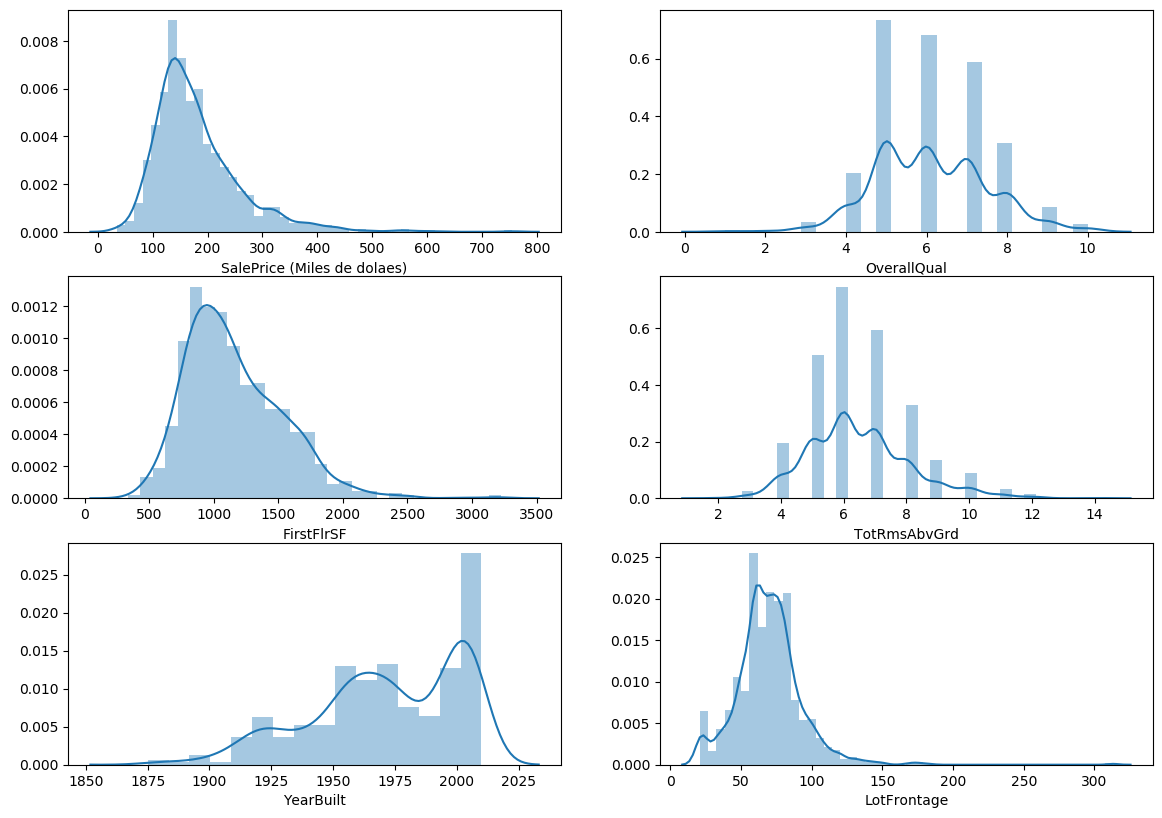

In [7]:
SalePrice = datos_entrenamiento[:,0]
OverallQual = datos_entrenamiento[:,1]
FirstFlrSF = datos_entrenamiento[:,2]
TotRmsAbvGrd = datos_entrenamiento[:,3]
YearBuilt = datos_entrenamiento[:,4]
#Existen datos que nos son números (nan) y se quitarán para realizar el cálculo
LotFrontageNan = np.isnan(datos_entrenamiento[:,5])
LotFrontage = datos_entrenamiento[LotFrontageNan==False,5]
SalePriceForLotFrontage = datos_entrenamiento[LotFrontageNan==False,0]


figura = plt.figure(dpi= 100,figsize=(14, 10))
plt.subplot(3,2,1)
sns.distplot(pd.Series(SalePrice, name="SalePrice (Miles de dolaes)"))
plt.subplot(3,2,2)
sns.distplot(pd.Series(OverallQual, name="OverallQual"))
plt.subplot(3,2,3)
sns.distplot(pd.Series(FirstFlrSF, name="FirstFlrSF"))
plt.subplot(3,2,4)
sns.distplot(pd.Series(TotRmsAbvGrd, name="TotRmsAbvGrd"))
plt.subplot(3,2,5)
sns.distplot(pd.Series(YearBuilt, name="YearBuilt"))
plt.subplot(3,2,6)
sns.distplot(pd.Series(LotFrontage, name="LotFrontage"))




## Coeficientes de correlacción y gráficas entre la variable dependiente y las independientes

0.7939900504626412
0.6162887000998714


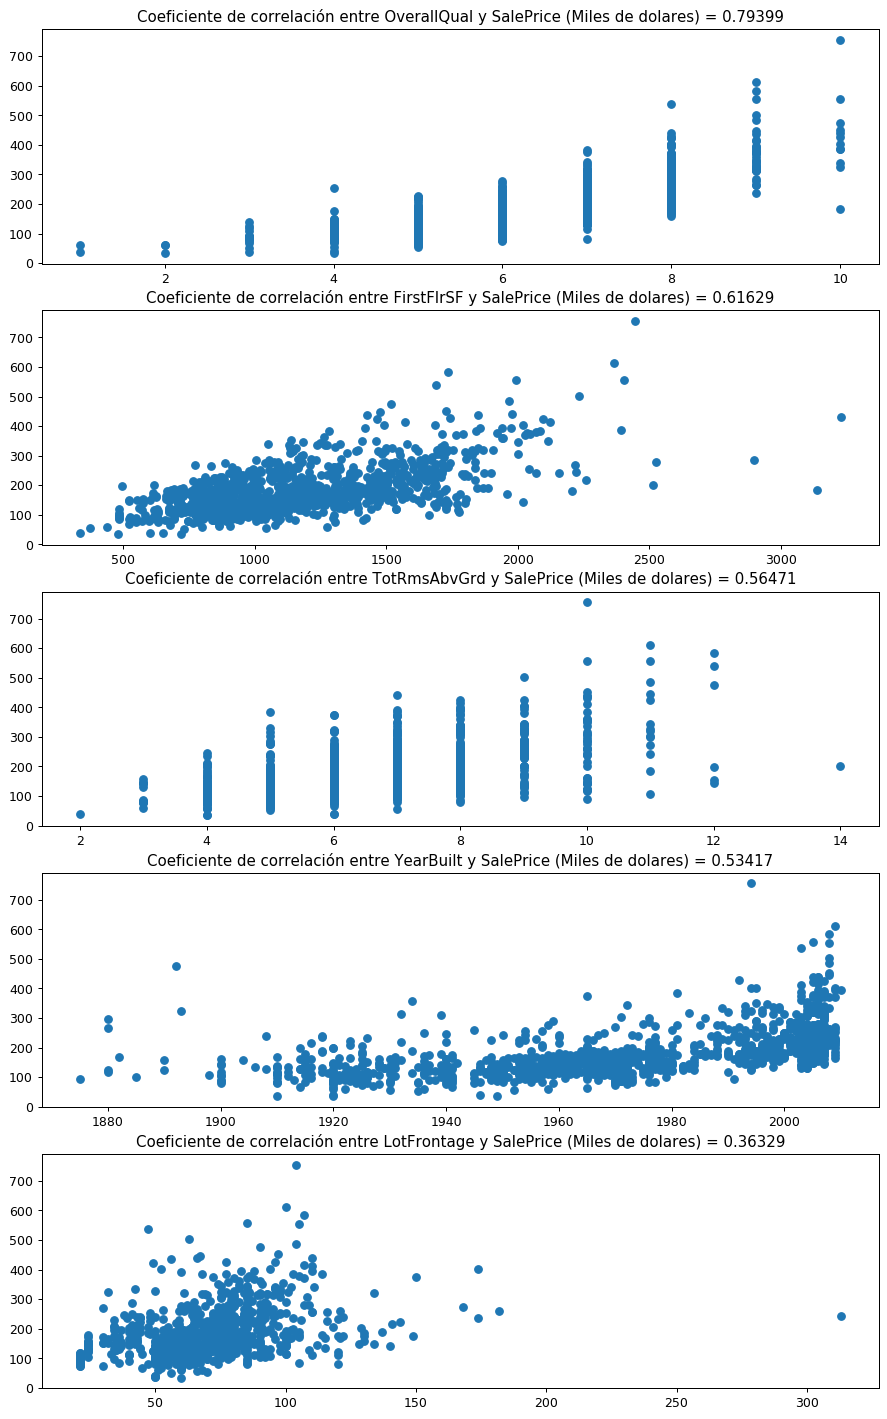

In [8]:
coef_corr_OverallQual = np.corrcoef(OverallQual, SalePrice)[0,1]
coef_corr_FirstFlrSF = np.corrcoef(FirstFlrSF, SalePrice)[0,1]
coef_corr_TotRmsAbvGrd = np.corrcoef(TotRmsAbvGrd, SalePrice)[0,1]
coef_corr_YearBuilt = np.corrcoef(YearBuilt, SalePrice)[0,1]
coef_corr_LotFrontage = np.corrcoef(LotFrontage, SalePriceForLotFrontage)[0,1]

figura = plt.figure(dpi= 90,figsize=(12, 20))

plt.subplot(5,1,1) 
plt.title("Coeficiente de correlación entre OverallQual y SalePrice (Miles de dolares) = %0.5f" %coef_corr_OverallQual)
plt.scatter(OverallQual, SalePrice)

plt.subplot(5,1,2)
plt.title("Coeficiente de correlación entre FirstFlrSF y SalePrice (Miles de dolares) = %0.5f" %coef_corr_FirstFlrSF)
plt.scatter(FirstFlrSF, SalePrice)

plt.subplot(5,1,3)
plt.title("Coeficiente de correlación entre TotRmsAbvGrd y SalePrice (Miles de dolares) = %0.5f" %coef_corr_TotRmsAbvGrd)
plt.scatter(TotRmsAbvGrd, SalePrice)


plt.subplot(5,1,4)
plt.title("Coeficiente de correlación entre YearBuilt y SalePrice (Miles de dolares) = %0.5f" %coef_corr_YearBuilt)
plt.scatter(YearBuilt, SalePrice)


plt.subplot(5,1,5)
plt.title("Coeficiente de correlación entre LotFrontage y SalePrice (Miles de dolares) = %0.5f" %coef_corr_LotFrontage)
plt.scatter(LotFrontage, SalePriceForLotFrontage)

print(coef_corr_OverallQual)
print(coef_corr_FirstFlrSF)


## Elección de variables independientes
Se elijen las variables independientes **OverallQual** y **FirstFlrSF** debido a que el coeficiente de correlación es mayor para las mismas:

* Coeficiente de correlación entre OverallQual y SalePrice (Miles de dolares): 0.79399
* Coeficiente de correlación entre FirstFlrSF y SalePrice  (Miles de dolares): 0.61629

In [9]:
def calcular_yhat(param_modelo,matriz_entrenamiento):
    return np.inner(param_modelo,matriz_entrenamiento)

In [10]:
def calcular_error(y_real,y_calculada):
    return 0.5*np.mean(np.power(y_real-y_calculada,2))

In [11]:
def entrenar_modelo_regresion_lineal(x,y,epochs,imprimir_error_cada,lr):
    matriz_para_entrenar = np.column_stack((x,np.ones_like(x)))
    parametros_modelo = np.array([0,0])
    error = np.zeros(epochs,dtype=float)
    modelo_resultante = dict()
    for n in range(epochs):
        modelo_resultante[n]=parametros_modelo
        #yhat=np.inner(parametros_modelo,matriz_para_entrenar)
        yhat=calcular_yhat(parametros_modelo,matriz_para_entrenar)
        #error[n]= 0.5*np.mean(np.power(y-yhat,2))
        error[n]= calcular_error(y,yhat) 
        dif_yhat_y = yhat-y
        gradiente_m_b = np.mean(np.column_stack((dif_yhat_y,dif_yhat_y))*matriz_para_entrenar,axis=0,dtype=np.float64)
        parametros_modelo = parametros_modelo - lr*gradiente_m_b
        if (n>0 and n%imprimir_error_cada==0):
            print("Iteracion", n, " Error", error[n]);
    return modelo_resultante,error

In [12]:
def visualizar_error(errores):
    plt.plot(np.linspace(0,np.shape(errores)[0]-1,np.shape(errores)[0],dtype=int), errores)
    plt.title('Error por cada iteración')
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.grid()
    plt.show()

In [13]:
def visualizar_modelo(modelos, n, x, y, x_label, y_label):
    matriz_para_entrenar = np.column_stack((x,np.ones_like(x)))
    fig = plt.figure(dpi=75, figsize=(10, 8))
    plt.title("Modelo en función del tiempo (No. de iteración).")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x, y)    
    for cont in range(0, len(modelos), n):
        yhat=calcular_yhat(modelos[cont],matriz_para_entrenar)
        plt.plot(x, yhat)
        plt.annotate("iteración = %d" % (cont), (np.max(x), calcular_yhat(modelos[cont], np.array([np.max(x),1]))))

## Entrenando modelo para la variable: OverallQual

In [14]:
modelos_OverallQual,errores_OverallQual = entrenar_modelo_regresion_lineal (OverallQual,SalePrice,355,50,0.00015)

Iteracion 50  Error 11252.763052511487
Iteracion 100  Error 6789.019792557665
Iteracion 150  Error 4346.283814939251
Iteracion 200  Error 3009.4866224479915
Iteracion 250  Error 2277.883017679466
Iteracion 300  Error 1877.4544397225397
Iteracion 350  Error 1658.2520281146612


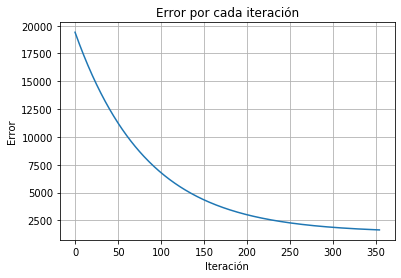

In [15]:
visualizar_error(errores_OverallQual)

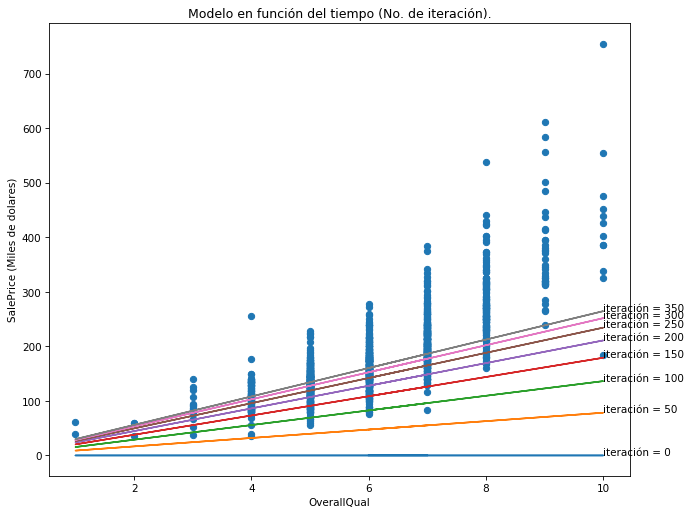

In [16]:
visualizar_modelo(modelos_OverallQual,50,OverallQual,SalePrice, "OverallQual", "SalePrice (Miles de dolares)")

## Entrenando modelo para la variable: FirstFlrSF

In [17]:
modelos_FirstFlrSF,errores_FirstFlrSF =entrenar_modelo_regresion_lineal (FirstFlrSF,SalePrice,100,10,0.000000033123)

Iteracion 10  Error 8365.45941648003
Iteracion 20  Error 4314.565195193666
Iteracion 30  Error 2828.749025854027
Iteracion 40  Error 2283.770664806858
Iteracion 50  Error 2083.8795734592595
Iteracion 60  Error 2010.5620771129377
Iteracion 70  Error 1983.6701558551904
Iteracion 80  Error 1973.806541506818
Iteracion 90  Error 1970.1886922490592


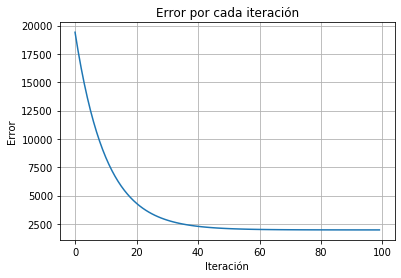

In [18]:
visualizar_error(errores_FirstFlrSF)

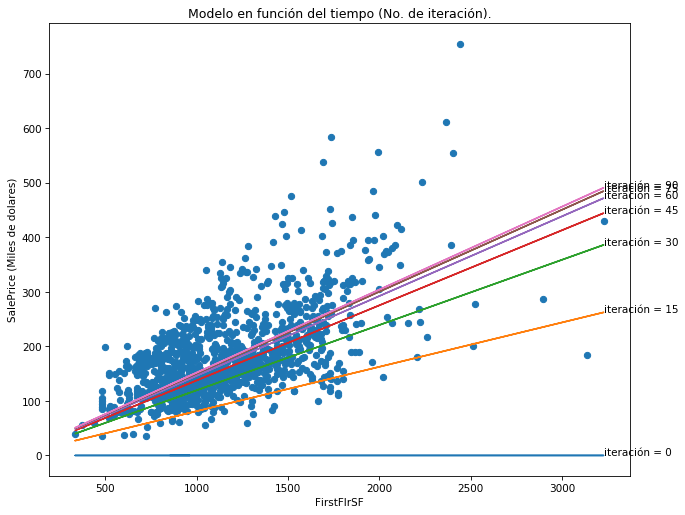

In [19]:
visualizar_modelo(modelos_FirstFlrSF,15,FirstFlrSF,SalePrice, "FirstFlrSF", "SalePrice (Miles de dolares)")

##  Usando scikit-learn para entrenar modelo de regresión lineal para OverallQual y FirstFlrSF

In [20]:
def entrenar_modelo_scikitLearn(x,y):
    LinReg = LinearRegression().fit(x.reshape(-1,1),y)
    #print(LinReg.score(x.reshape(-1,1),y))
    return np.array([LinReg.coef_[0],LinReg.intercept_])


In [21]:
def promedio_modelos(modelo_Manual, modelo_ScikitLearn, x):
    matriz_para_validar = np.column_stack((x,np.ones_like(x)))
    yhat_modelo_Manual = calcular_yhat(modelo_Manual, matriz_para_validar)  
    yhat_modelo_ScikitLearn = calcular_yhat(modelo_ScikitLearn, matriz_para_validar) 
    yhat_combinacion_promedio = (yhat_modelo_Manual+yhat_modelo_ScikitLearn)/2
    return yhat_modelo_Manual, yhat_modelo_ScikitLearn, yhat_combinacion_promedio


In [22]:
#Ubicando los mejores modelos manuales
Mejor_OverallQual_Manual = modelos_OverallQual[np.argmin(errores_OverallQual)]
Mejor_FirstFlrSF_Manual = modelos_FirstFlrSF[np.argmin(errores_FirstFlrSF)]

#Entrenadno Modelos con scikitLearn
OverallQual_scikitLearn = entrenar_modelo_scikitLearn(OverallQual,SalePrice)
FirstFlrSF_scikitLearn = entrenar_modelo_scikitLearn(FirstFlrSF,SalePrice)

# Utilizando datos para testing
SalePrice_Validacion = datos_validacion[:,0]
OverallQual_Validacion = datos_validacion[:,1]
FirstFlrSF_Validacion = datos_validacion[:,2]

#Combinación de modelos utilizando datos para testing 
yhat_OverallQual_Manual, yhat_OverallQual_ScikitLearn, yhat_OverallQual_promedio = promedio_modelos(Mejor_OverallQual_Manual,OverallQual_scikitLearn,OverallQual_Validacion)
yhat_FirstFlrSF_Manual, yhat_FirstFlrSF_ScikitLearn, yhat_FirstFlrSF_promedio = promedio_modelos(Mejor_FirstFlrSF_Manual,FirstFlrSF_scikitLearn,FirstFlrSF_Validacion)

#Calculando el error para cada modelo para la variable OverallQual
error_OverallQual_Manual=calcular_error(SalePrice_Validacion,yhat_OverallQual_Manual)
error_OverallQual_ScikitLearn=calcular_error(SalePrice_Validacion,yhat_OverallQual_ScikitLearn)
error_OverallQual_promedio=calcular_error(SalePrice_Validacion,yhat_OverallQual_promedio)

#Calculando el error para cada modelo para la variable FirstFlrSF
error_FirstFlrSF_Manual=calcular_error(SalePrice_Validacion,yhat_FirstFlrSF_Manual)
error_FirstFlrSF_ScikitLearn=calcular_error(SalePrice_Validacion,yhat_FirstFlrSF_ScikitLearn)
error_FirstFlrSF_promedio=calcular_error(SalePrice_Validacion,yhat_FirstFlrSF_promedio)

#reg.predict(np.array([[3, 5]]))

In [33]:
def graficar_errores_modelos(errores_modelos,variable):
    fig = plt.figure(dpi= 60, figsize=(8, 6),facecolor='w', edgecolor='k')
    eje = plt.axes()
    plt.title('Errores para los diferentes modelos de: '+ variable)
    plt.ylabel('Error')   
    etiquetas = ['Manual', 'Scikit-learn', 'Promedio']
    eje.set_xticks([1,2,3])
    eje.set_xticklabels(etiquetas)
    eje.grid()
    eje.bar([1,2,3], height= errores_modelos) 

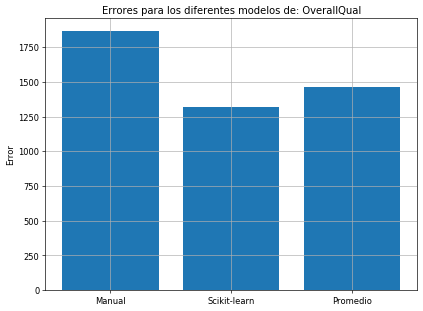

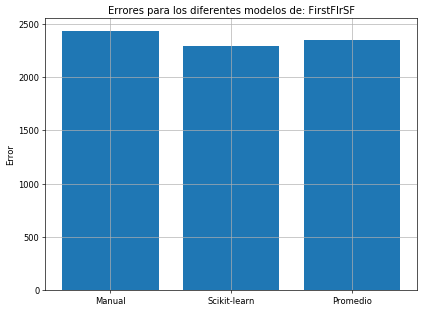

In [34]:
errores_OverallQual = [error_OverallQual_Manual, error_OverallQual_ScikitLearn, error_OverallQual_promedio]
graficar_errores_modelos(errores_OverallQual,"OverallQual")
errores_FirstFlrSF = [error_FirstFlrSF_Manual, error_FirstFlrSF_ScikitLearn, error_FirstFlrSF_promedio]
graficar_errores_modelos(errores_FirstFlrSF,"FirstFlrSF")

## Comparando juntos los modelos

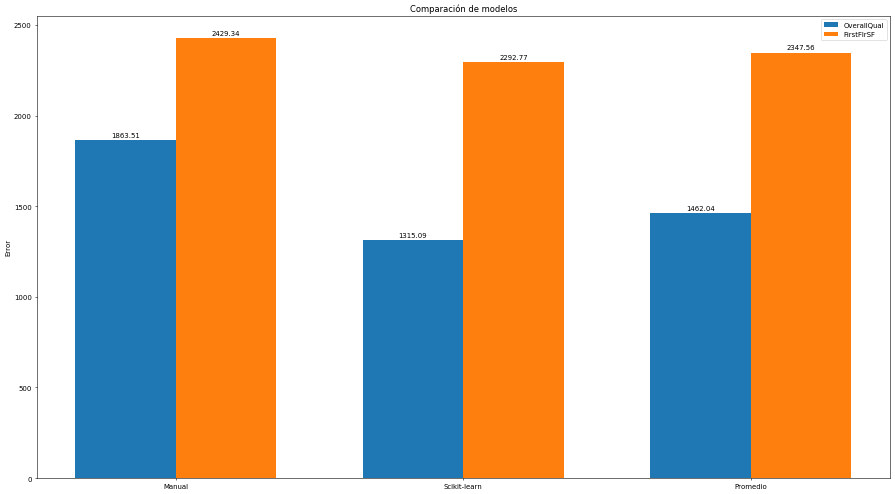

In [127]:
figura = plt.figure(dpi=50,figsize=(18,10))
ax = figura.add_subplot(111)
ax.set_title('Comparación de modelos')
ax.set_ylabel('Error')
ancho_barra = 0.35
pos = np.array([1,2,3])
ax.set_xticks(pos+ancho_barra/2)
ax.set_xticklabels(['Manual', 'Scikit-learn', 'Promedio'])
grupo_barra1 = ax.bar(pos,errores_OverallQual,width=ancho_barra,label='OverallQual')
grupo_barra2 = ax.bar(pos+ancho_barra,errores_FirstFlrSF,width=ancho_barra,label='FirstFlrSF')
ax.legend()

def etiquetar_barras(grupo_barra):
    for barra in grupo_barra:
        altura_barra = barra.get_height()
        ax.annotate('{0:.2f}'.format(altura_barra),
                    xy=(barra.get_x() + barra.get_width() / 2, altura_barra),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


etiquetar_barras(grupo_barra1)
etiquetar_barras(grupo_barra2)

figura.tight_layout()

plt.show()

## Conclusion
Las variables que mejor correlación tienen con **SalesPrice** son:
* **OverallQual**
* **FistFlrSF**

De estas dos variables la que mejor permite predecir el precio de una casa es **OverallQual** ya que la medida del error producido es mucho menor que **FistFlrSF**, esto es congurente con lo que refleja el coeficiente de correlación ya que para esta variable fue el valor más alto. 

Para la variable **OverallQual** el mejor modelo es el generado por **Scikit-learn** debido a que el error es mucho mas bajo que el generado por el modelo construído a partir de iteraciones.

Para la variable **FistFlrSF** el mejor modelo es el generado por **Scikit-learn** debido a que el error es mucho mas bajo que el generado por el modelo construído a partir de iteraciones, aunque en este caso la diferencia es mucho menor.
